# Group Uranus - Phase 2 Project
![King County Skyline](./images/skyline.jpeg)
## Contributors:  Brad Blackwood, Ashley Eakland and Jalen Charles
### Project Proposal: A user-friendly tool to predict pricing of homes using just a few key metrics, accomplished using multiple linear regression analysis.

### Building Condition [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

### Building Grade [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r)
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import OLS
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [3]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

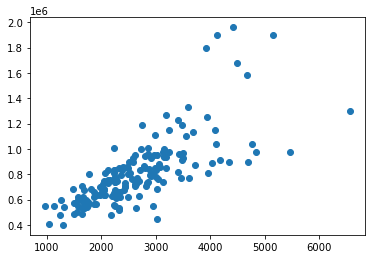

In [4]:
y = df[df['zipcode'] == 98005]['price']
x = df[df['zipcode'] == 98005]['sqft_living']

plt.scatter(x, y)

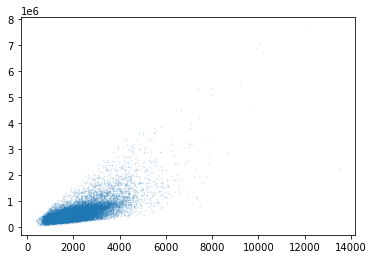

In [5]:
# sqft_living
# price

x = df['sqft_living']
y = df['price']

plt.scatter(x, y, alpha = .15, s= .4)

In [6]:
df[df['zipcode'] == 98005].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.293229,0.602608,0.740920,0.566596,0.435987,0.777308,0.427175,0.098636,NaN,0.529695,0.198970,0.674625,0.397516
bedrooms,0.293229,1.000000,0.362850,0.545460,0.299922,0.084771,0.302207,0.026695,-0.081983,NaN,0.218388,0.143646,0.275105,0.222452
bathrooms,0.602608,0.362850,1.000000,0.716835,0.383228,0.478232,0.620989,0.550833,0.041331,NaN,0.387685,0.226978,0.536440,0.345951
sqft_living,0.740920,0.545460,0.716835,1.000000,0.510779,0.426776,0.786090,0.401876,0.004121,NaN,0.499581,0.185618,0.658809,0.403712
sqft_lot,0.566596,0.299922,0.383228,0.510779,1.000000,0.321917,0.504037,0.166455,-0.013749,NaN,0.611847,0.283477,0.600156,0.619629
floors,0.435987,0.084771,0.478232,0.426776,0.321917,1.000000,0.652533,0.620710,-0.102883,NaN,0.388322,0.342794,0.418034,0.221950
sqft_above,0.777308,0.302207,0.620989,0.786090,0.504037,0.652533,1.000000,0.454368,0.079430,NaN,0.546579,0.259574,0.696711,0.399360
yr_built,0.427175,0.026695,0.550833,0.401876,0.166455,0.620710,0.454368,1.000000,-0.211315,NaN,0.238243,0.361009,0.318313,0.161520
yr_renovated,0.098636,-0.081983,0.041331,0.004121,-0.013749,-0.102883,0.079430,-0.211315,1.000000,NaN,0.040105,-0.041954,-0.081255,0.020770
zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

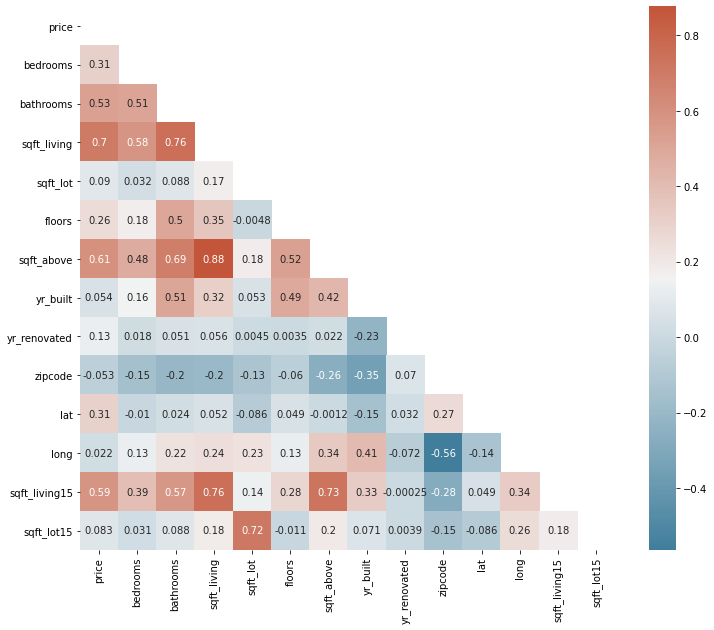

In [7]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [8]:
zipcodes = pd.get_dummies(df.zipcode)
zip_cat = pd.concat([df, zipcodes], axis=1)

In [9]:
# zip_price = pd.concat([df.price, df.sqft_living, zipcodes], axis=1) #grade_labels[0].astype('int64')

# # y = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 6)].price
# # x = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 6)].sqft_living

# # plt.scatter(x, y)
# # grade_set = list(set(zip_price[0]))

# # zip_price[(zip_price[0] == 7) & (zip_price[98001] == 1)]

# # x2 = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 8)].sqft_living
# # y2 = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 8)].price

# # plt.scatter(x2, y2)

# y3 = zip_price.price
# x3 = zip_price.drop('price', axis=1)

# lr = LinearRegression()

# x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=.2)

# lr.fit(x3_train, y3_train)

# lr.score(x3_test, y3_test) # ~.75 

# # try making the grade categorical

# grade_cat = zip_price#.drop(0, axis=1)
# grade_cat = pd.concat([grade_cat, pd.get_dummies(df.grade)], axis=1)

# y4 = grade_cat.price
# x4 = grade_cat.drop('price', axis=1)

# x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=.2)

# lr.fit(x4_train, y4_train)

# lr.score(x4_test, y4_test) # ~.77

# grade_cat

# price = y4_train
# preds = x4_train
# test_lm1 = OLS(price,preds)
# results = test_lm1.fit()
# results.summary()

# # lr.predict()
# # grade_cat

# y5 = grade_cat.price
# x5 = grade_cat.drop('price', axis=1)

# x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=.2)

# lr.fit(x4_train, y4_train)

# price = y5_train
# preds = x5_train
# test_lm1 = OLS(price,preds)
# results = test_lm1.fit()
# results.summary()

In [10]:
zip_cat.describe().astype(int)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
count,21597,21597,21597,21597,21597,21597,21597,21597,17755,21597,...,21597,21597,21597,21597,21597,21597,21597,21597,21597,21597
mean,540296,3,2,2080,15099,1,1788,1970,83,98077,...,0,0,0,0,0,0,0,0,0,0
std,367368,0,0,918,41412,0,827,29,399,53,...,0,0,0,0,0,0,0,0,0,0
min,78000,1,0,370,520,1,370,1900,0,98001,...,0,0,0,0,0,0,0,0,0,0
25%,322000,3,1,1430,5040,1,1190,1951,0,98033,...,0,0,0,0,0,0,0,0,0,0
50%,450000,3,2,1910,7618,1,1560,1975,0,98065,...,0,0,0,0,0,0,0,0,0,0
75%,645000,4,2,2550,10685,2,2210,1997,0,98118,...,0,0,0,0,0,0,0,0,0,0
max,7700000,33,8,13540,1651359,3,9410,2015,2015,98199,...,1,1,1,1,1,1,1,1,1,1


In [11]:
box_df = zip_cat.copy()
box_df = box_df[['price', 'bedrooms', 'bathrooms', 'sqft_living']]
box_df.head()

,price,bedrooms,bathrooms,sqft_living
id,,,,
7129300520,221900.0,3,1.00,1180
6414100192,538000.0,3,2.25,2570
5631500400,180000.0,2,1.00,770
2487200875,604000.0,4,3.00,1960
1954400510,510000.0,3,2.00,1680


/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


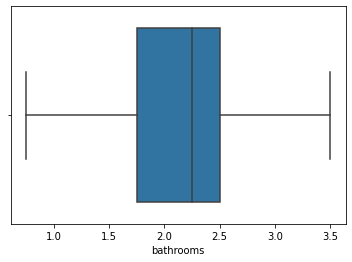

In [12]:
import seaborn as sns
sns.boxplot(box_df['bathrooms'], showfliers=False);


/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


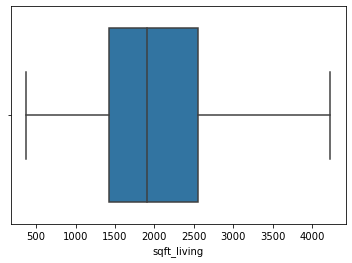

In [13]:
sns.boxplot(box_df['sqft_living'], showfliers=False);

/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


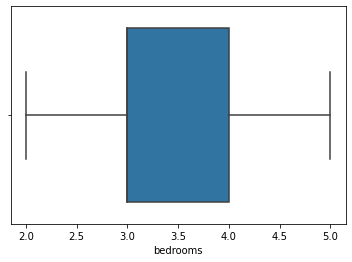

In [14]:
sns.boxplot(box_df['bedrooms'],showfliers=False);

/Users/aeakland/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: This method only works with the ScalarFormatter

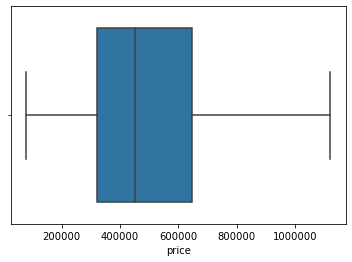

In [15]:
# plt.figure(figsize=(10,6))
ax = sns.boxplot(box_df['price'],showfliers=False)
plt.ticklabel_format(style='plain')



# plt.figure(figsize = (15,8))
# ax = sns.barplot(x = 'Date', y = 'Price',data = df)
# plt.xticks(rotation=45)

In [26]:
lr = LinearRegression()
y6 = zip_cat.price
x6 = zip_cat.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                   'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15'], axis=1)

x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=.2)

lr.fit(x6_train, y6_train)

price = y6_train
preds = x6_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

#lr.score(x6_test, y6_test)

# bed + bath + zip + sqft ~.74
# x6.columns

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     696.2
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        13:49:31   Log-Likelihood:            -2.3396e+05
No. Observations:               17277   AIC:                         4.681e+05
Df Residuals:                   17204   BIC:                         4.686e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -4.442e+04   1897.446    -23.409      0.000   -4.81e+04   -4.07e+04
bathrooms    1.344e+04   2884.136      4.661      0.000    7789.244    1.91e+04
sqft_living   267.4027      2.616    102.214      0.000     262.275     272.531
98001        -1.04e+05   1.23e+04     -8.475      0.000   -1.28e+05      -8e+04
98002       -8.049e+04   1.58e+04     -5.087      0.000   -1.12e+05   -4.95e+04
98003       -1.019e+05   1.35e+04     -7.548      0.000   -1.28e+05   -7.55e+04
98004        6.918e+05   1.32e+04     52.282      0.000    6.66e+05    7.18e+05
98005        2.236e+05   1.66e+04     13.448      0.000    1.91e+05    2.56e+05
98006        2.164e+05   1.13e+04     19.208      0.000    1.94e+05    2.38e+05
98007        1.692e+05   1.87e+04      9.032      0.000    1.33e+05    2.06e+05
98008        2.183e+05   1.37e+04     15.985      0.000    1.92e+05    2.45e+05
98010        -3.17e+04   2.12e+04     -1.495      0.135   -7.33e+04    9867.701
98011         1.54e+04    1.6e+04      0.962      0.336    -1.6e+04    4.68e+04
98014        3068.8328   1.95e+04      0.157      0.875   -3.51e+04    4.13e+04
98019       -4.188e+04   1.61e+04     -2.606      0.009   -7.34e+04   -1.04e+04
98022       -6.514e+04   1.44e+04     -4.519      0.000   -9.34e+04   -3.69e+04
98023       -1.211e+05   1.08e+04    -11.205      0.000   -1.42e+05   -9.99e+04
98024         7.11e+04   2.39e+04      2.972      0.003    2.42e+04    1.18e+05
98027        6.198e+04   1.18e+04      5.271      0.000    3.89e+04     8.5e+04
98028         1.79e+04   1.35e+04      1.328      0.184   -8530.127    4.43e+04
98029         1.21e+05    1.3e+04      9.319      0.000    9.55e+04    1.46e+05
98030       -9.631e+04   1.39e+04     -6.922      0.000   -1.24e+05    -6.9e+04
98031       -9.083e+04   1.39e+04     -6.522      0.000   -1.18e+05   -6.35e+04
98032       -8.244e+04   1.91e+04     -4.313      0.000    -1.2e+05    -4.5e+04
98033        2.919e+05   1.16e+04     25.169      0.000    2.69e+05    3.15e+05
98034        1.101e+05   1.05e+04     10.501      0.000    8.96e+04    1.31e+05
98038       -8.513e+04   1.04e+04     -8.216      0.000   -1.05e+05   -6.48e+04
98039        1.333e+06   2.88e+04     46.260      0.000    1.28e+06    1.39e+06
98040        4.872e+05    1.4e+04     34.799      0.000     4.6e+05    5.15e+05
98042       -9.036e+04   1.05e+04     -8.575      0.000   -1.11e+05   -6.97e+04
98045       -2992.3638   1.47e+04     -0.203      0.839   -3.18e+04    2.58e+04
98052        1.431e+05   1.04e+04     13.709      0.000    1.23e+05    1.64e+05
98053        8.364e+04   1.19e+04      7.009      0.000    6.02e+04    1.07e+05
98055       -5.754e+04   1.37e+04     -4.188      0.000   -8.45e+04   -3.06e+04
98056       -2773.2861   1.16e+04     -0.239      0.811   -2.56e+04       2e+04
98058       -6.555e+04   1.11e+04     -5.88

In [ ]:
lr.intercept_

In [ ]:
np.random.seed(42)
sample_pt = zip_cat.sample(1)
sample_pt_price = sample_pt.iloc[0,1]
sample = sample_pt.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                   'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15'], axis=1)

# Show my random sample off
print(f'Price of sample: ${sample_pt_price}')
sample

In [ ]:
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    
    rmse = []
    r2 = []
    point_predictions = [] if (sample_pt is not None) else None
    y7 = data.price
    x7 = data.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
    lr7 = LinearRegression()

    for i in range(ntimes):
        x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)
        lr7.fit(x7_train, y7_train)
        y_hat = lr7.predict(x7_test)
        rmse.append(np.sqrt(mean_squared_error(y7_test, y_hat)))
        r2.append(lr7.score(x7_test, y7_test))

        if sample_pt is not None:
            y_hat_pt = lr7.predict(sample_pt)
            point_predictions.append(y_hat_pt[0])
                  
    return rmse, r2, point_predictions

In [ ]:
#x axis actual prices, y axis normalize predictions
def train_lr_randomly(data, sample_pt=None, ntimes=100):
    
    rmse = []
    r2 = []
    point_predictions = [] if (sample_pt is not None) else None
    y7 = data.price
    x7 = data.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
    lr7 = LinearRegression()
    
    x_axis = [] # actual price
    y_axis = [] # % error

    for i in range(ntimes):
        x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)
        lr7.fit(x7_train, y7_train)
        
        y_hat = lr7.predict(x7_test)
        
        x_axis.append(y7_test)
        y_axis.append((y_hat-y7_test)/y7_test)# predicted price - acutal price / actual price
        
        plt.scatter(x_axis, y_axis, s=.1, alpha=.2)
        plt.xlim(0,1000000)
        plt.ylim(-1, 1)
        plt.xlabel('Home Price')
        plt.ticklabel_format(style='plain')
        plt.ylabel('Model Error')
        
        rmse.append(np.sqrt(mean_squared_error(y7_test, y_hat)))
        r2.append(lr7.score(x7_test, y7_test))

        if sample_pt is not None:
            y_hat_pt = lr7.predict(sample_pt)
            point_predictions.append(y_hat_pt[0])
                  
    return rmse, r2, point_predictions

In [ ]:
train_lr_randomly(data=zip_cat,sample_pt=sample, ntimes=5)

In [ ]:
zip_cat.price.median()

In [ ]:
y7 = zip_cat.price
x7 = zip_cat.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                       'sqft_living15', 'sqft_lot15'], axis=1)
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=.2)


linreg = LinearRegression()
linreg.fit(x7_train, y7_train)
y_hat_train = linreg.predict(x7_train)
y_hat_test = linreg.predict(x7_test)
train_res = y_hat_train - y7_train
test_res = y_hat_test - y7_test
mse_train = mean_squared_error(y7_train, y_hat_train)
mse_test = mean_squared_error(y7_test, y_hat_test)
print(np.sqrt(mse_train))
print(np.sqrt(mse_test))

In [ ]:
def price_predictor():
    beds = int(input('How many bedrooms?'))
    baths = int(input('How many bathrooms?'))
    sqft = int(input('How many square feet?'))
    zip_ = int(input('What is the zipcode?'))
    
    entry = pd.DataFrame(0, index=['sample'], columns=x6.columns)
    entry['bedrooms'] = beds
    entry['bathrooms'] = baths
    entry['sqft_living'] = sqft
    entry[zip_] = 1
    
    price_target = f'${round(float(lr.predict(entry)), 2)}'
    return price_target

price_predictor()

In [ ]:
import folium
location = df.groupby('zipcode')[['lat', 'long']].mean()
long = location['long']
lat = location['lat']
price = df.groupby('zipcode')['price'].median()
zip_1 = location.index

base_map = folium.Map([47.6, -122.25], zoom_start=11)

points = list(zip(lat, long, price, zip_1))
for p in points:
    lat = p[0]
    long = p[1]
    zip_1 = p[3]
    price = f'{zip_1} : ${str(p[2])}'
#     marker = folium.Marker(location=[lat, long])
    popup = folium.Popup(price, parse_html=True)
    
    marker = folium.Marker(location=[lat, long], popup=popup)
    marker.add_to(base_map)
    
#     marker.add_to(base_map)

base_map

# long

In [ ]:
y = trimmed.price
X = trimmed.drop('price', axis=1)

trimmed.columns # sqft + zipcode

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X,y)

In [ ]:
model.score(X,y)

In [ ]:
x_var = df[['sqft_living']] # grade
y_var = df.price

X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=.2)

In [ ]:
model.fit(X_train,y_train)
model.score(X_test, y_test) # training = 0.49938431424133234

# USE LABEL ENCODING FOR GRADE

In [ ]:
le = LabelEncoder()

# seperate value for grade

grade_labels = df.grade.str.split(' ', 1, expand=True)
new_df = pd.concat([df.price, df.sqft_living, df.zipcode.astype('object'), grade_labels[0].astype('int64')], axis=1)

x = new_df.drop('price', axis=1)
y = new_df.price

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2)

model.fit(X_train,y_train)
model.score(X_test, y_test)

model.coef_

In [ ]:
# sss = new_df.reset_index().drop('id', axis=1)

In [ ]:
new_df.groupby('zipcode').count()

In [ ]:
plt.scatter(df.long, df.lat, s=1)